In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
cofee_production = pd.read_csv('C:/Users/HP/Downloads/Data+Viz+with+Matplotlib+&+Seaborn/Data Viz with Matplotlib & Seaborn/Data/coffee/total-production.csv').T
cofee_production.columns = cofee_production.iloc[0]
cofee_production = cofee_production.drop("total_production")

In [5]:
cofee_production.head()

total_production,Angola,Bolivia (Plurinational State of),Brazil,Burundi,Ecuador,Indonesia,Madagascar,Malawi,Papua New Guinea,Paraguay,...,Panama,Sierra Leone,Sri Lanka,Thailand,Togo,Trinidad & Tobago,Uganda,Venezuela,Viet Nam,Yemen
1990,50.345,122.777,27285.6286,487.393,1503.815,7441.383,982.447,104.628,962.841,130.627,...,214.987,42.783,95.87,757.017,161.308,14.581,1955.009,1122.477,1310.288,0.0
1991,79.331,103.536,27293.4934,667.199,2123.824,8493.196,932.513,124.286,746.816,79.653,...,192.532,54.379,81.549,1468.936,432.652,17.792,2088.001,940.704,1437.848,0.0
1992,77.52,120.235,34603.3542,620.238,1185.48,5569.478,1121.684,137.161,900.111,54.291,...,196.978,39.084,53.181,1254.945,85.648,14.328,2185.074,1215.298,2340.447,0.0
1993,32.608,50.823,28166.9786,393.354,2069.007,6743.288,441.859,62.111,1019.481,70.046,...,142.066,37.451,53.79,1275.201,194.939,16.079,3141.706,1332.881,3020.216,0.0
1994,76.802,116.944,28192.047,664.143,2375.766,5367.878,641.372,84.112,1138.659,24.689,...,248.313,72.738,42.448,1399.135,176.296,18.435,2392.753,988.996,3631.609,0.0


In [6]:
cofee_production.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29 entries, 1990 to 2018
Data columns (total 56 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Angola                            29 non-null     object
 1   Bolivia (Plurinational State of)  29 non-null     object
 2   Brazil                            29 non-null     object
 3   Burundi                           29 non-null     object
 4   Ecuador                           29 non-null     object
 5   Indonesia                         29 non-null     object
 6   Madagascar                        29 non-null     object
 7   Malawi                            29 non-null     object
 8   Papua New Guinea                  29 non-null     object
 9   Paraguay                          29 non-null     object
 10  Peru                              29 non-null     object
 11  Rwanda                            29 non-null     object
 12  Timor-Leste             

In [12]:
total_production_by_producers = cofee_production.sum().sort_values(ascending=False).iloc[:10]
total_production_by_producers.head()

total_production
Brazil       1190965.7353
Viet Nam      439540.9519
Colombia      345871.4464
Indonesia     245116.7707
Ethiopia      141542.8931
dtype: object

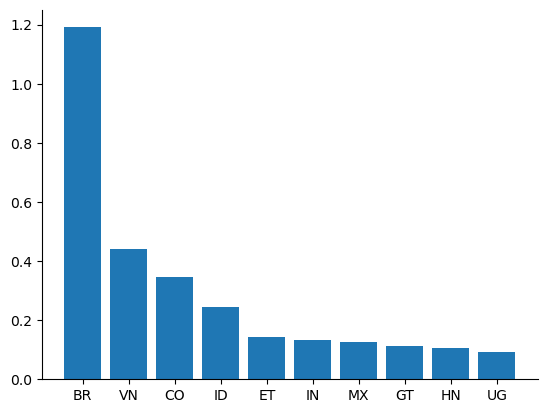

In [19]:
fig, ax = plt.subplots()
ax.bar(x = total_production_by_producers.index, height = total_production_by_producers/1000000)
positions = list(range(10))

labels = ["BR", "VN", "CO", "ID", "ET", "IN", "MX", "GT", "HN", "UG"]

ax.set_xticks(positions)
ax.set_xticklabels(labels)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.show()

In [22]:
top5 = cofee_production.loc[:, ["Brazil", "Viet Nam", "Colombia", "Indonesia", "Ethiopia"]]
top5.index = top5.index.astype("datetime64[ns]")
top5.head()

total_production,Brazil,Viet Nam,Colombia,Indonesia,Ethiopia
1990-01-01,27285.6286,1310.288,14396.0,7441.383,2909.451
1991-01-01,27293.4934,1437.848,17980.397,8493.196,2924.664
1992-01-01,34603.3542,2340.447,14946.878,5569.478,1825.171
1993-01-01,28166.9786,3020.216,11422.422,6743.288,2967.004
1994-01-01,28192.047,3631.609,12964.0,5367.878,2762.73


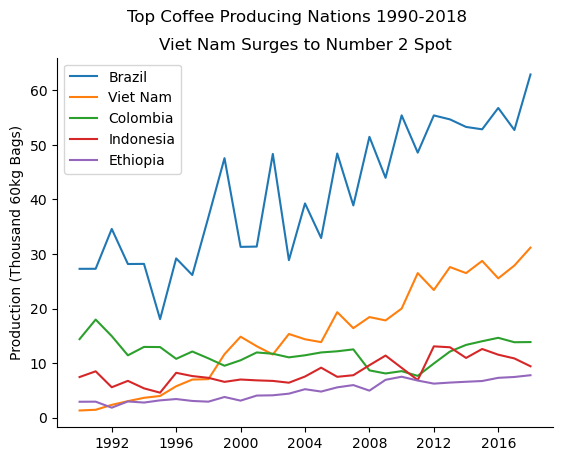

In [27]:
fig, ax = plt.subplots()

ax.plot(top5.index, cofee_production['Brazil'] / 1000, label = "Brazil")
ax.plot(top5.index, cofee_production['Viet Nam'] / 1000, label = "Viet Nam")
ax.plot(top5.index, cofee_production['Colombia'] / 1000, label = "Colombia")
ax.plot(top5.index, cofee_production['Indonesia'] / 1000, label = "Indonesia")
ax.plot(top5.index, cofee_production['Ethiopia'] / 1000, label = "Ethiopia")

fig.suptitle("Top Coffee Producing Nations 1990-2018")
ax.set_title("Viet Nam Surges to Number 2 Spot")
ax.set_ylabel("Production (Thousand 60kg Bags)")

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.legend()

plt.show()

In [29]:
brazil_vs_others = (cofee_production
                    .assign(rest_of_world = cofee_production
                            .drop("Brazil", axis=1).sum(axis=1))
                    .loc[:, ["Brazil", "rest_of_world"]]
                    .astype({"Brazil": "float64"})
                   )

brazil_vs_others

total_production,Brazil,rest_of_world
1990,27285.6286,65944.4310
1991,27293.4934,73973.1910
1992,34603.3542,63922.5450
1993,28166.9786,63597.6430
1994,28192.0470,65121.1470
1995,18060.2022,69257.2560
1996,29196.7430,74105.8530
1997,26148.0040,73713.1950
1998,36760.8533,72131.3598
1999,47577.8065,83805.9902


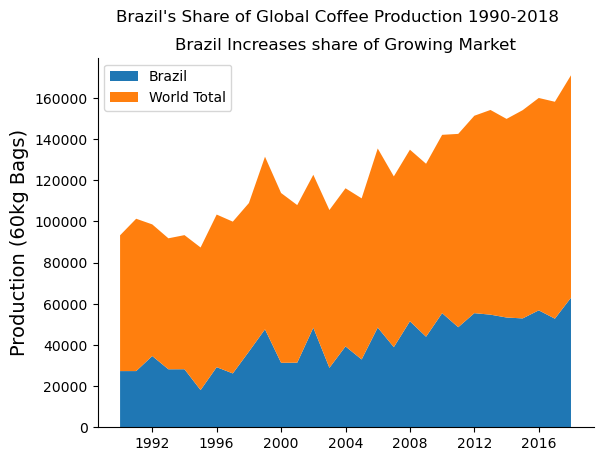

In [30]:
fig, ax = plt.subplots()

ax.stackplot(
    brazil_vs_others.index.astype("datetime64[ns]"), 
    brazil_vs_others["Brazil"], 
    brazil_vs_others["rest_of_world"],
    labels=["Brazil", "World Total"]
)


fig.suptitle("Brazil's Share of Global Coffee Production 1990-2018")
ax.set_title("Brazil Increases share of Growing Market")
ax.set_ylabel("Production (60kg Bags)", fontsize=14)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.legend(loc="upper left")